In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'), header=None)
test_df = pd.read_csv(os.path.join('data', 'test.csv'), header=None)

# convert to image example

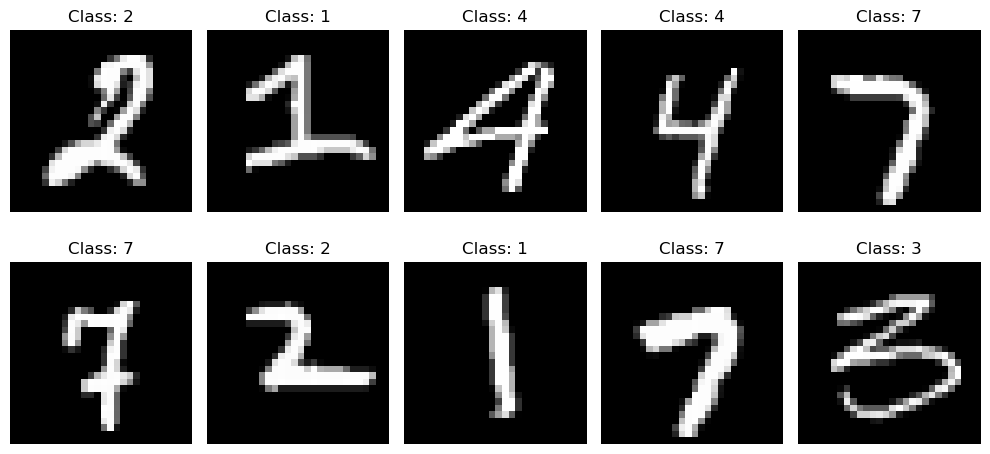

In [10]:
random_rows = train_df.sample(10) # get 10 example rows

fig, axes = plt.subplots(2, 5, figsize=(10, 5))


axes = axes.ravel()


for i in range(10):
    row = random_rows.iloc[i]
    label = row[0]  
    pixels = row[1:].values  
    image = pixels.reshape(28, 28)  # reshape to 28x28 image
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Class: {label}')
    axes[i].axis('off')  

plt.tight_layout()
plt.show()

# Class imbalance

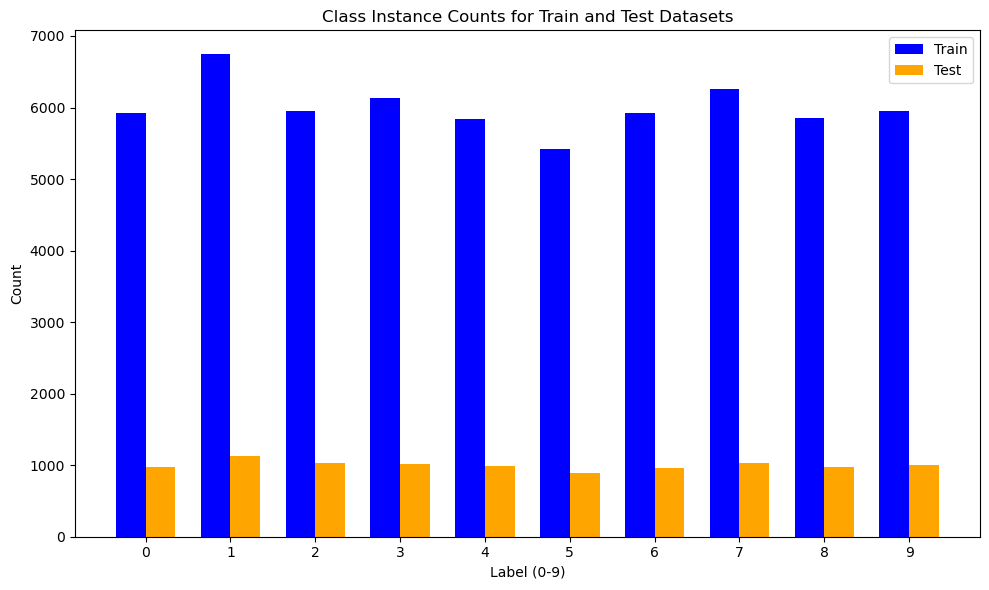

In [11]:
# Count the occurrences of each value (0-9) in the first column of both dataframes
train_counts = train_df[0].value_counts().sort_index()
test_counts = test_df[0].value_counts().sort_index()

# Ensure both counts have entries for all values (0-9), filling missing ones with 0
values = np.arange(10)
train_counts = train_counts.reindex(values, fill_value=0)
test_counts = test_counts.reindex(values, fill_value=0)

# Set up the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(values))  # The label locations (0-9)

plt.figure(figsize=(10,6))

# Plot the bars
plt.bar(index, train_counts, bar_width, label='Train', color='blue')
plt.bar(index + bar_width, test_counts, bar_width, label='Test', color='orange')

# Add labels and title
plt.xlabel('Label (0-9)')
plt.ylabel('Count')
plt.title('Class Instance Counts for Train and Test Datasets')
plt.xticks(index + bar_width / 2, values)  # Center ticks under the bars
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Feature values

In [7]:
min_values = train_df.min()
max_values = train_df.max()

# Combine them into a single DataFrame for convenience
min_max_df = pd.DataFrame({'min': min_values, 'max': max_values})

# Display the result
display(min_max_df)
print(np.unique(min_max_df))

,min,max
0,0,9
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
780,0,62
781,0,0
782,0,0
783,0,0


[  0   7   9  15  16  28  29  31  32  37  38  39  40  42  47  51  52  59
  60  62  63  64  72  93  94  95  96  98 101 104 107 113 116 121 127 128
 131 133 134 137 141 144 150 152 153 157 163 165 166 184 185 188 190 191
 192 197 203 210 214 216 217 220 221 223 225 226 234 244 245 247 252 253
 254 255]
